# Playground for Time Series Analysis

In this notebook I will experiment with different implementations of time series.

In [9]:
from __future__ import division
import numpy as np
import pandas as pd

### Basic Funcs

In [198]:
from numpy import sum as sum_

def cov(s_1, s_2):
    """
    Returns the covariance of two series. Degrees of Freedom set to 0.
    
    Parameters
    ----------
    
        s_1 : np.array
            First series
            
        s_2 : np.array
            Second series
            
    Returns
    -------
    
        covariance : float
    """
    # set the length of the series
    n = len(s_1)
    
    # check that both series are the same length
    # else raise an error
    if len(s_2) != n:
        raise ValueError('Unmatched number of elements in series')

    # calculation (E[XY] - E[X]E[Y])
    # expectations empirically estimated
    e_xy = np.sum(s_1 * s_2) / n 
    e_x = np.sum(s_1) / n
    e_y = np.sum(s_2) / n
    return e_xy - (e_x * e_y)

def var(s_1, unbiased=True):
    """
    Returns the variance of a series.
    
    Parameters
    ----------
    
        s_1 : np.array
            A series

        biased : boolean

    Returns
    -------
    
        variance : float
    """ 
    # calculation
    n = len(s_1)
    
    if n == 1:
        return 0.

    # change for biased/unbiased
    # will use sample variance (unbiased) as default
    e_x = sum_(s_1) / n
    
    if unbiased:
        n -= 1
    return sum_((s_1 - e_x)**2) / n

### Autocovariance

In [174]:
def acvf(ts, max_lag, plot_flag, ax=None):
    """
    Function to return the value of the autocovariance
    function of the time-series `ts` up to max_lags.
    
    Parameters
    ----------
    
        ts : np.array
            np.array of a timeseries
            
        max_lag : int
            the largest lag given for the acvf. If the
            `max_lag` exceeds the largest lag possible for
            the data, the maximum lag possible will be returned.
            
        plot_flag : boolean
            if `true`, returns a plot of the acvf function
            with lags up to `max_lag`
            
    Returns
    -------
    
        acvf_array : np.array
            array containing `max_lag` calculations of the acvf
            for time series `ts`
    """
    # check if max_lag less than ts
    if len(ts) < max_lag:
        max_lag = len(ts)
        
    # create np array to store values
    acvf_array = np.empty((max_lag))

    # get autocovariances
    for i in xrange(max_lag):
        acvf_array[i] = cov(ts[i:], ts[:(len(ts)-i)])
        
    if plot_flag:
        return single_ts_plot(acvf(ts, max_lag), ax, 'Autocovariance', 'ACVF', True)
    else:
        return acvf_array


def acf(ts, max_lag, plot_flag, ax=None):
    """
    Function to return the value of the autocorrelation
    function of the time-series `ts` up to max_lags.
    
    Parameters
    ----------
    
        ts : np.array
            np.array of a timeseries
            
        max_lag : int
            the largest lag given for the acf. If the
            `max_lag` exceeds the largest lag possible for
            the data, the maximum lag possible will be returned.
            
    Returns
    -------
    
        acf_array : np.array
            array containing `max_lag` calculations of the acf
            for time series `ts`
    """
    acvf_ = acvf(ts, max_lag)
    return acvf_ / acvf_[0]

In [193]:
a = np.random.rand(200)
b = np.random.rand(200)

In [109]:
np.cov(a, b, ddof=0)

array([[ 0.05832448, -0.01530836],
       [-0.01530836,  0.06169224]])

In [110]:
cov_(a,b)

-0.015308364557151455

In [157]:
var(b, True)

0.068546933710443569

In [159]:
np.var(b, ddof=1)

0.068546933710443569

In [171]:
acvf(a, 20)

array([  7.42724846e-02,   5.38375810e-03,  -1.19061726e-02,
         3.31481990e-03,  -1.45735574e-04,  -2.31730773e-03,
        -1.69306126e-03,   1.25069675e-02,   1.42858461e-02,
        -9.11240869e-03,  -1.74593575e-02,  -1.04582684e-02,
         7.98864017e-03,  -3.68595634e-05,  -1.39162622e-02,
         1.47072092e-03,  -6.95802358e-03,  -2.08137085e-03,
        -5.73930019e-03,  -2.89277558e-04])

In [175]:
acf(a, 20)

array([  1.00000000e+00,   7.24865760e-02,  -1.60303948e-01,
         4.46305239e-02,  -1.96217448e-03,  -3.12000836e-02,
        -2.27952690e-02,   1.68393013e-01,   1.92343722e-01,
        -1.22688890e-01,  -2.35071677e-01,  -1.40809459e-01,
         1.07558542e-01,  -4.96274813e-04,  -1.87367668e-01,
         1.98016927e-02,  -9.36823861e-02,  -2.80234444e-02,
        -7.72735720e-02,  -3.89481461e-03])

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline

<Container object of 20 artists>

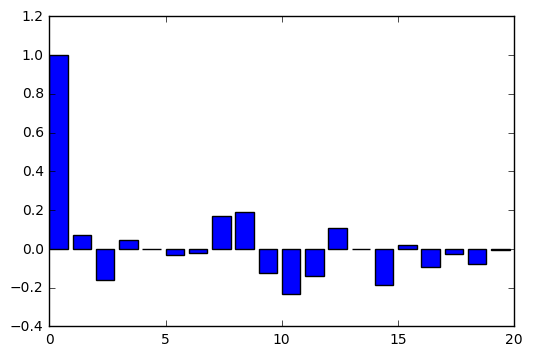

In [179]:
plt.bar(xrange(20), acf(a, 20))

### Plotting Library

In [202]:
def single_ts_plot(arr, ax, title, type_, ci_flag=True):
    """
    Function to take in an array and produce a 
    matplotlib bar chart on an axis
    """
    
    # formatting
    ax.set_title(title)
    ax.set_xlabel('Lags')
    ax.set_ylabel(type_)
    
    # plot points
    ax.bar(xrange(len(arr)), arr, alpha=0.4, color='blue')
    
    # confidence intervals for white noise process
    if ci_flag:
        ax.axhline(1 / (len(arr)**.5), color='red', ls='--')
        ax.axhline(-1 / (len(arr)**.5), color='red', ls='--')

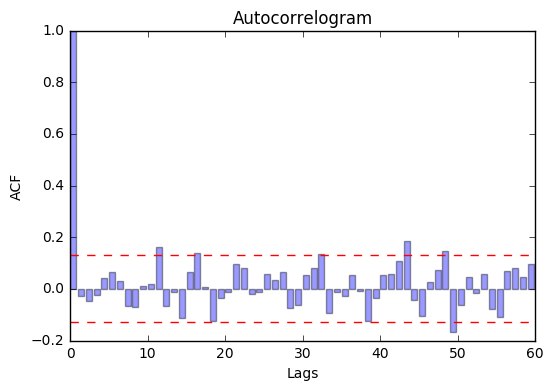

In [194]:
fig, ax = plt.subplots(1,1)
ax = single_ts_plot(acf(a, 60), ax, 'Autocorrelogram', 'ACF', True)

In [196]:
np.var([1])

0.0

In [199]:
var(np.array([1]))

0.0

In [200]:
def acvf(ts, max_lag, plot=True):
    """
    Function to return the value of the autocovariance
    function of the time-series `ts` up to max_lags.
    
    Parameters
    ----------
    
        ts : np.array
            np.array of a timeseries
            
        max_lag : int
            the largest lag given for the acvf. If the
            `max_lag` exceeds the largest lag possible for
            the data, the maximum lag possible will be returned.
            
    Returns
    -------
    
        acvf_array : np.array
            array containing `max_lag` calculations of the acvf
            for time series `ts`
    """
    # check if max_lag less than ts
    if len(ts) < max_lag:
        max_lag = len(ts)
        
    # create np array to store values
    acvf_array = np.empty((max_lag))

    # get autocovariances
    for i in xrange(max_lag):
        acvf_array[i] = cov(ts[i:], ts[:(len(ts)-i)])
        
    # for graphical output
    if plot:
        fig, ax = plt.subplots(1,1)
        ax  = single_ts_plot(
            acvf_array,
            ax,
            'Autocovariance Function',
            'ACVF',
        )
        plt.show()
    else:
        return acvf_array

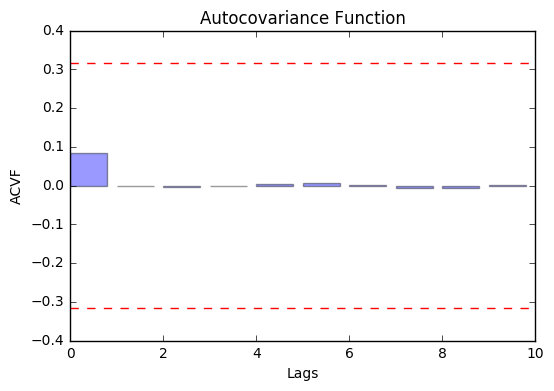

In [204]:
acvf(a, 10)

In [210]:
def var(s_1, unbiased=True):
    """
    Returns the variance of a series.
    
    Parameters
    ----------
    
        s_1 : np.array
            A series

        biased : boolean

    Returns
    -------
    
        variance : float
    """
    # calculation
    try:
        n = len(s_1)
    except TypeError:
        raise TypeError('Empty array passed to `var`')

    # change for biased/unbiased
    # will use sample variance (unbiased) as default
    e_x = sum_(s_1) / n

    # if s_1 has one element
    if n <= 1:
        return 0.
    
    if unbiased:
        n -= 1
    return sum_((s_1 - e_x)**2) / n

In [211]:
var(np.array([]))

0.0